# 가위바위보 분류기 만들기

## 데이터 불러오기 + Resize하기

In [1]:
# 224*224 to 28*28
!pip install pillow
from PIL import Image
import os, glob
import random

print('import 완료')

import 완료


* 가위, 바위, 보 resize

In [2]:
pwd

'/home/ssac26/ssac notebook'

In [3]:
target_size = (28,28)

In [4]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac26/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [5]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
image_dir_path2 = os.getenv('HOME')+"/aiffel/rock_scissor_paper/rock"
print('이미지 디렉토리 경로2', image_dir_path2)

images2 = glob.glob(image_dir_path2+"/*.jpg")

for img in images2:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS) #사이즈 변경
    new_img.save(img,'JPEG')
    
print('바위이미지 resize완료')

이미지 디렉토리 경로2 /home/ssac26/aiffel/rock_scissor_paper/rock
바위이미지 resize완료


In [6]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
image_dir_path3 = os.getenv('HOME')+"/aiffel/rock_scissor_paper/paper"
print('이미지 디렉토리 경로3', image_dir_path3)

images3 = glob.glob(image_dir_path3+"/*.jpg")

for img in images3:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS) #사이즈 변경
    new_img.save(img,'JPEG')
    
print('보 이미지 resize완료')

이미지 디렉토리 경로3 /home/ssac26/aiffel/rock_scissor_paper/paper
보 이미지 resize완료


In [7]:
import numpy as np

In [8]:
## 데이터 읽어오기
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data= 3600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3600 입니다.
x_train shape: (3600, 28, 28, 3)
y_train shape: (3600,)


라벨:  0


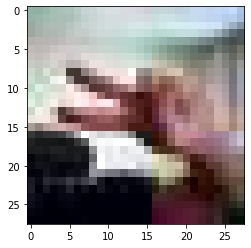

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

In [10]:
## 딥러닝 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [11]:
#  train_test_split 이용 train, validation, test셋 분리 (정규화된 데이터 사용)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train1, x_val, y_train1, y_val = train_test_split(x_train_norm, y_train,  test_size=0.2, random_state=12)

In [14]:
x_train1.shape, x_val.shape, y_train1.shape, y_val.shape

((2880, 28, 28, 3), (720, 28, 28, 3), (2880,), (720,))

In [15]:
x_train_real, x_test, y_train_real, y_test = train_test_split(x_train1, y_train1, test_size=0.2, random_state=12)

In [16]:
x_train_real.shape, y_train_real.shape, x_test.shape, y_test.shape

((2304, 28, 28, 3), (2304,), (576, 28, 28, 3), (576,))

* 3600개의 데이터 중  
* 2304개의 train_real, 720개의 val, 576개의 test로 분리

In [40]:
n_channel_1=24
n_channel_2=16
n_dense=12
n_train_epoch=100

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(n_channel_1,(3,3), activation='relu',input_shape=(28,28,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(n_channel_2,(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(n_dense, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))


In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 24)        672       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        3472      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)              

In [42]:
model.compile(keras.optimizers.Adam(0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(x_train_real, y_train_real, epochs=n_train_epoch, validation_data = (x_val,y_val))

Epoch 1/100
72/72 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.3516 - val_loss: 1.0574 - val_accuracy: 0.4139
Epoch 2/100
72/72 [==============================] - 0s 3ms/step - loss: 1.0043 - accuracy: 0.4666 - val_loss: 0.9618 - val_accuracy: 0.5542
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 0.8833 - accuracy: 0.5764 - val_loss: 0.8253 - val_accuracy: 0.6278
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 0.7773 - accuracy: 0.6398 - val_loss: 0.7309 - val_accuracy: 0.6667
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.6797 - val_loss: 0.5989 - val_accuracy: 0.7347
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7461 - val_loss: 0.6154 - val_accuracy: 0.7458
Epoch 7/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7539 - val_loss: 0.5661 - val_accuracy: 0.7625
Epoch 8/100
7

Epoch 59/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1681 - accuracy: 0.9440 - val_loss: 0.2185 - val_accuracy: 0.9444
Epoch 60/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.9392 - val_loss: 0.2300 - val_accuracy: 0.9333
Epoch 61/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1630 - accuracy: 0.9479 - val_loss: 0.2353 - val_accuracy: 0.9375
Epoch 62/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1635 - accuracy: 0.9466 - val_loss: 0.2227 - val_accuracy: 0.9347
Epoch 63/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.9436 - val_loss: 0.2118 - val_accuracy: 0.9361
Epoch 64/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1692 - accuracy: 0.9457 - val_loss: 0.2279 - val_accuracy: 0.9333
Epoch 65/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1443 - accuracy: 0.9431 - val_loss: 0.2075 - val_accuracy: 0.9292
Epoch 

## 잘 만들어졌는지 확인하기

In [21]:
# ## test 데이터 읽어오기
# def load_data(img_path):
#     # 가위 : 0, 바위 : 1, 보 : 2
#     number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
#     img_size=28
#     color=3
#     #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
#     imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
#     labels=np.zeros(number_of_data,dtype=np.int32)

#     idx=0
#     for file in glob.iglob(img_path+'/scissor/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=0   # 가위 : 0
#         idx=idx+1

#     for file in glob.iglob(img_path+'/rock/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=1   # 바위 : 1
#         idx=idx+1       
    
#     for file in glob.iglob(img_path+'/paper/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=2   # 보 : 2
#         idx=idx+1
        
#     print("평가데이터(x_test)의 이미지 개수는",idx,"입니다.")
#     return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper2"
# (x_test, y_test)=load_data(image_dir_path)
# x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# print("x_test.shape: {}".format(x_test.shape))
# print("y_test.shape: {}".format(y_test.shape))

In [44]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

18/18 - 0s - loss: 0.2039 - accuracy: 0.9497
test_loss: 0.20386618375778198 
test_accuracy: 0.9496527910232544


In [23]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포[0.42853138 0.17040904 0.40105966]
라벨1,예측결과0


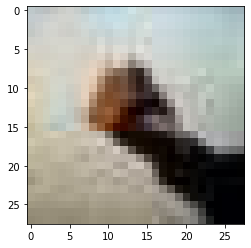

예측확률분포[0.37199283 0.18241751 0.44558963]
라벨1,예측결과2


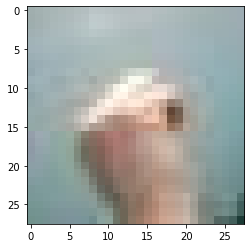

예측확률분포[1.6660866e-01 1.1376967e-06 8.3339018e-01]
라벨0,예측결과2


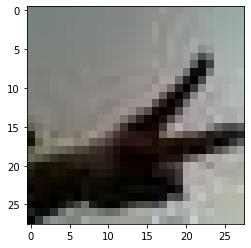

예측확률분포[0.23113412 0.31286445 0.45600143]
라벨1,예측결과2


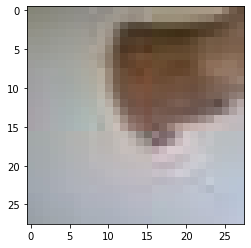

예측확률분포[0.3886417  0.603413   0.00794533]
라벨0,예측결과1


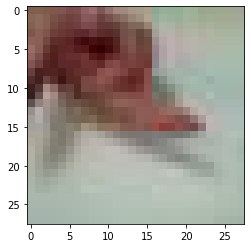

예측확률분포[0.86014533 0.01314323 0.12671137]
라벨2,예측결과0


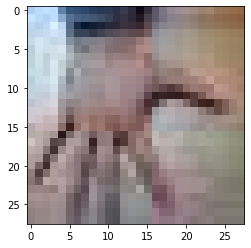

예측확률분포[0.17631392 0.09301636 0.73066974]
라벨0,예측결과2


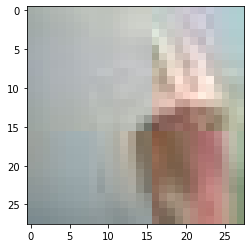

예측확률분포[0.13841306 0.06489282 0.79669416]
라벨0,예측결과2


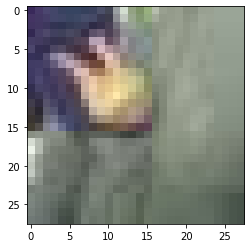

예측확률분포[0.27022645 0.31979474 0.40997884]
라벨1,예측결과2


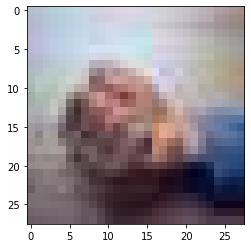

예측확률분포[0.3560372  0.39465684 0.249306  ]
라벨0,예측결과1


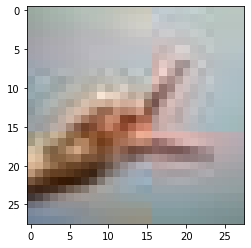

In [24]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels와 y_test가 다른경우만
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
# wrong에서 랜덤하게 5개만 뽑기
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print('예측확률분포'+str(predicted_result[n]))
    print('라벨'+str(y_test[n])+",예측결과"+str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [25]:
# # 데이터 추가
# # 100-199등 파일 명을 폴더 단위로 바꾸기
# import os
# i =400    # 해당 인덱스부터 차레대로 이름 지정
# file_path = os.getenv("HOME")+"/Downloads/rps/scissors"
# #  예시 : /home/ssac27/aiffel/rock_scissor_paper/paper"
# file_name = os.listdir(file_path)

# for idx, name in enumerate(file_name) :
#     src = os.path.join(file_path, name)
#     new_name = os.path.join(file_path, str(i+idx) +'.jpg')
#     os.rename(src, new_name)
# # 해당  코드에서 path 부분과 i 부분을 원하는 걸로 바꾸시고 사용하면 폴더 단위로 파일 명이 숫자 순서대로  바뀝니다.
